In [3]:
library(ISLR)
# fix(Hitters)
print(names(Hitters))

 [1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"


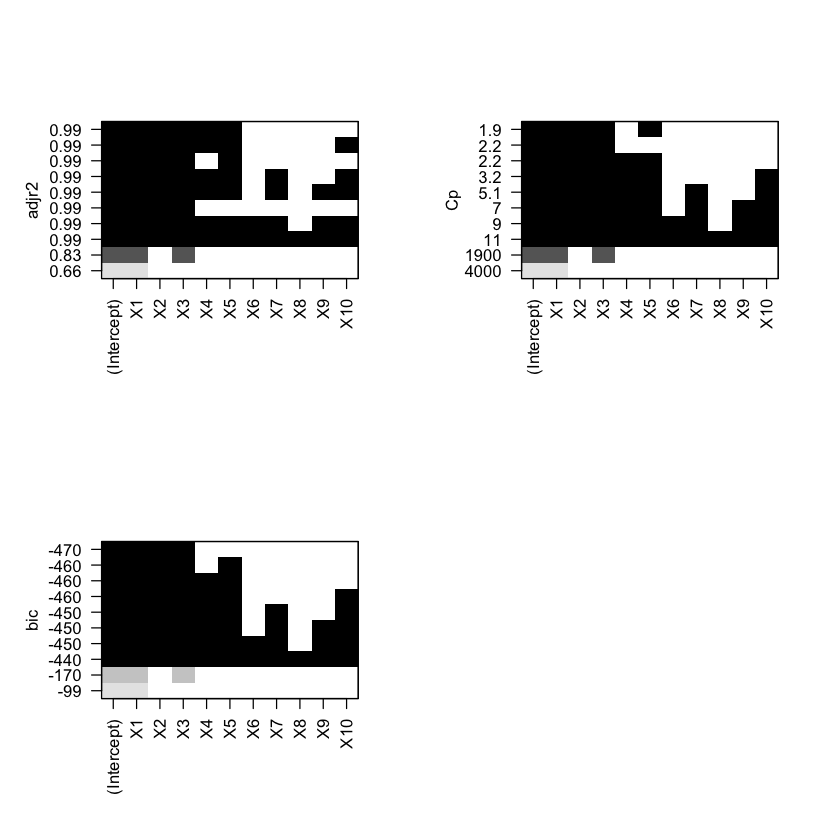

In [21]:
library(leaps)
set.seed(1)
X <- rnorm(100)
noise <- rnorm(100)
# b)                                                                                                                                
Y <- 1+2*X+3*X^2+3*X^3+noise
X <- poly(X,10)
# c)                                                                                                                                
data.full <- data.frame(X, Y)
?regsubsets
regfit <- regsubsets(Y~.,data=data.full, nvmax=10)
par(mfrow=c(2,2))
plot(regfit, scale="adjr2")
plot(regfit, scale="Cp")
plot(regfit, scale="bic")